# MNIST Dataset Analysis Report

# 1. Project Information

This project analyzes the MNIST dataset, a benchmark in machine learning and deep learning. It focuses on preprocessing data, building predictive models for digit classification, and evaluating their performance to derive actionable insights.


# 2. Description of Data

The MNIST dataset contains images of handwritten digits (0-9), with the following characteristics:

- **Training Set:** 60,000 examples
- **Test Set:** 10,000 examples
- **Image Dimensions:** 28x28 pixels
- **Format:** Grayscale images stored in IDX format
- **Dataset Zip File Size:** Approximately 12 MB

The dataset was downloaded from a publicly accessible source and processed for analysis.


# 3. Project Objectives | Problem Statements

### Objectives:

1. Preprocess the MNIST dataset to make it suitable for analysis and modeling.
2. Apply machine learning and deep learning models to classify handwritten digits.
3. Compare model performance in terms of accuracy, precision, recall, and training/prediction times.
4. Provide actionable insights and recommendations based on the findings.

### Problem Statements:

- Can machine learning models classify handwritten digits with high accuracy?
- Which model performs best in terms of speed and accuracy?
- What preprocessing steps are essential for optimal model performance?


# 4. Analysis of Data

### **Steps Involved:**

1. **Data Loading:**

   - The MNIST dataset was downloaded, extracted, and loaded using Python libraries like `gdown` and `idx2numpy`.
   - Validation checks ensured the data was correctly extracted and accessible.

2. **Preprocessing:**

   - Normalized pixel values by dividing by 255 to scale them between 0 and 1.
   - One-hot encoded labels for compatibility with deep learning models.

3. **Feature Engineering:**

   - Applied Sobel edge detection and Gaussian smoothing for additional feature extraction.

4. **Model Training:**

   - Models trained: Decision Tree, Random Forest, XGBoost, and Neural Network.
   - Cross-validation was used for certain models to enhance reliability.

5. **Model Evaluation Metrics:**

   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Training Time
   - Prediction Time


# Code Block

## Module Installation & Imports

In [1]:
# %pip install gdown
# %pip install idx2numpy
# %pip install pandas
# %pip install numpy
# %pip install opencv-python
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow

In [2]:
# File handling and OS
import os
import gdown
import zipfile

# Data processing
import pandas as pd
import numpy as np
import idx2numpy

# Image processing
import cv2
from scipy.ndimage import gaussian_filter, sobel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from xgboost import XGBClassifier

# Deep Learning
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# Miscellaneous
import warnings
import time

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## File/Data Loading

In [3]:
# URL of the file on Google Drive
file_url = "https://drive.google.com/uc?id=10CensBIDjtk_kaYBHTtlSHOc3Npn1cJ-"

# Output filename
output_file = "mnist_dataset.zip"

# Download the file
print("Downloading dataset...")
try:
    gdown.download(file_url, output_file, quiet=False)
    print(f"File downloaded: {output_file}")
except Exception as e:
    print(f"Failed to download the file: {e}")
    exit()

# Check if the file exists and unzip it
if os.path.exists(output_file):
    if output_file.endswith(".zip"):
        print("Extracting ZIP file...")
        try:
            with zipfile.ZipFile(output_file, 'r') as zip_ref:
                zip_ref.extractall("mnist_data")
            print("Dataset extracted to 'mnist_data' folder.")
        except zipfile.BadZipFile:
            print("Error: The file is not a valid ZIP archive.")
    else:
        print(f"The file {output_file} is not a ZIP file.")
else:
    print(f"The file {output_file} does not exist after download.")

Downloading...
From: https://drive.google.com/uc?id=10CensBIDjtk_kaYBHTtlSHOc3Npn1cJ-
To: C:\Users\ABHIJEET\DLM\mnist_dataset.zip
100%|██████████| 11.6M/11.6M [00:03<00:00, 3.48MB/s]


File downloaded: mnist_dataset.zip
Extracting ZIP file...
Dataset extracted to 'mnist_data' folder.


In [4]:
# Standardized File Paths
base_path = r'mnist_data'  # Base directory for all MNIST files
train_images_path = f"{base_path}/train-images-idx3-ubyte/train-images-idx3-ubyte"
train_labels_path = f"{base_path}/train-labels-idx1-ubyte/train-labels-idx1-ubyte"
test_images_path = f"{base_path}/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"
test_labels_path = f"{base_path}/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"

In [5]:
# Load data
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

## Data information

In [6]:
# Check the shapes
print("Train images shape:", train_images.shape)  # (60000, 28, 28)
print("Train labels shape:", train_labels.shape)  # (60000,)
print("Test images shape:", test_images.shape)    # (10000, 28, 28)
print("Test labels shape:", test_labels.shape)    # (10000,)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [7]:
# Flatten the images for DataFrame compatibility
train_images_flat = train_images.reshape(train_images.shape[0], -1)  # (60000, 784)
test_images_flat = test_images.reshape(test_images.shape[0], -1)    # (10000, 784)

# Convert to DataFrames
train_images_df = pd.DataFrame(train_images_flat)
train_labels_df = pd.DataFrame(train_labels, columns=["Label"])
test_images_df = pd.DataFrame(test_images_flat)
test_labels_df = pd.DataFrame(test_labels, columns=["Label"])

In [8]:
# Display the head of each DataFrame
pd.set_option('display.max_columns', None)  # Show all columns
print("Train Images (head):")
train_images_df.head()

Train Images (head):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,

In [9]:
print("\nTrain Labels (head):")
train_labels_df.head()


Train Labels (head):


,Label
0,5
1,0
2,4
3,1
4,9


In [10]:
print("\nTest Images (head):")
test_images_df.head()


Test Images (head):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
print("\nTest Labels (head):")
test_labels_df.head()


Test Labels (head):


,Label
0,7
1,2
2,1
3,0
4,4


## Preprocessing

In [12]:
# Rescaling pixel values to the range [0, 1]
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

## Edge Detections

In [13]:
# Functions for processing
def AA02_edge_detection(AA02_image):
    # Apply Sobel filter for edge detection
    AA02_dx = sobel(AA02_image, axis=0)  # Horizontal edges
    AA02_dy = sobel(AA02_image, axis=1)  # Vertical edges
    AA02_edges = np.hypot(AA02_dx, AA02_dy)  # Magnitude of gradients
    return AA02_edges / np.max(AA02_edges)  # Normalize to [0, 1]

def AA02_gaussian_smoothing(image, sigma=1):
    return gaussian_filter(image, sigma=sigma)

def AA02_canny_edge_detection(image):
    # Normalize image to uint8
    image = (image * 255).astype(np.uint8)
    edges = cv2.Canny(image, threshold1=50, threshold2=150)
    return edges

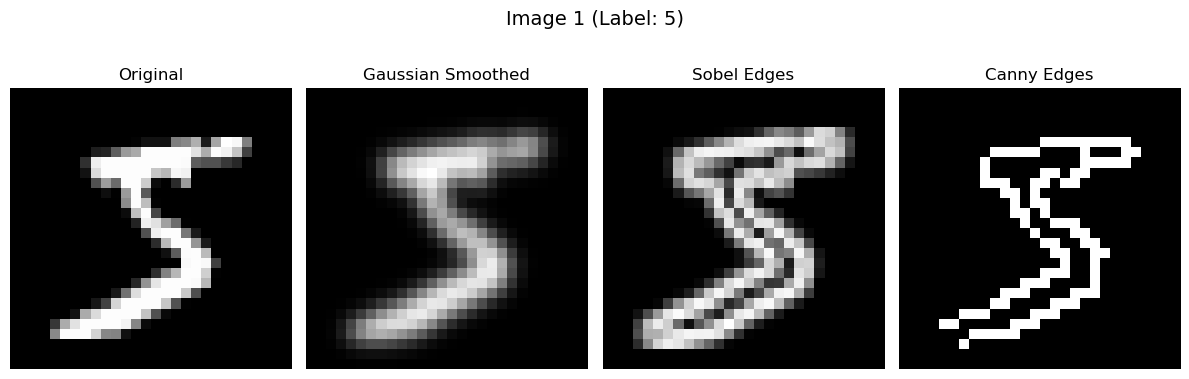

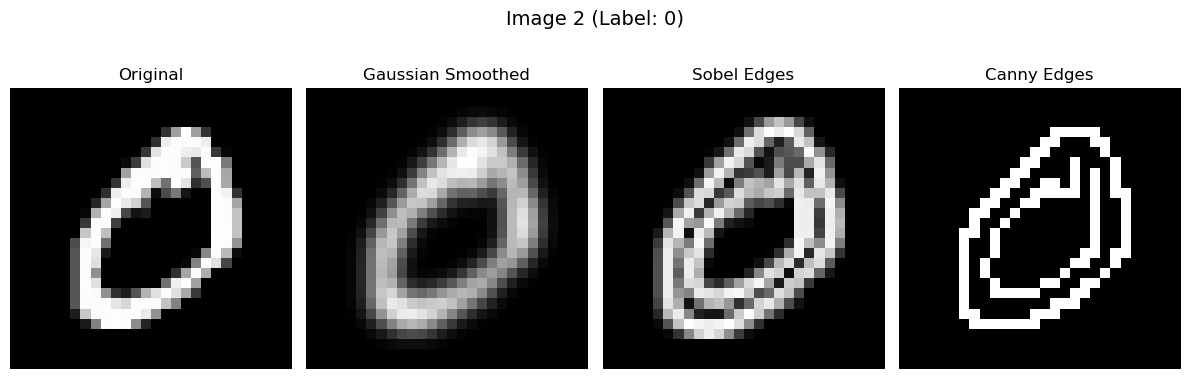

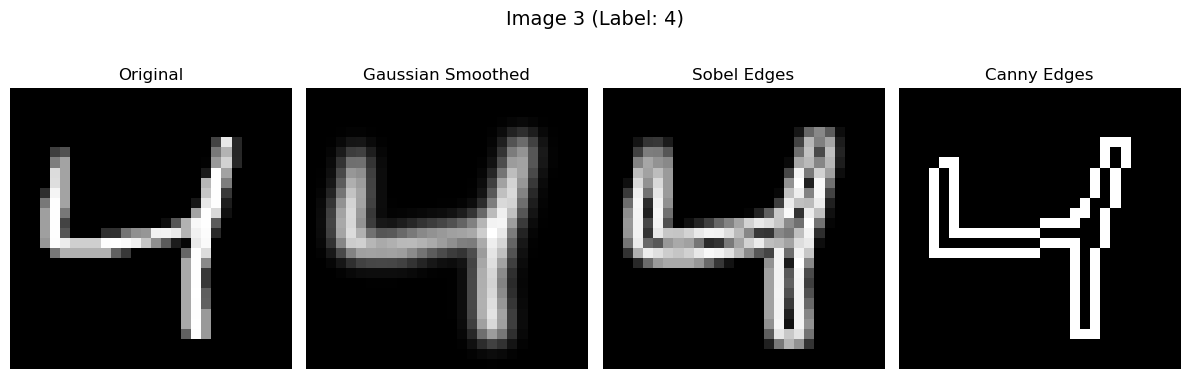

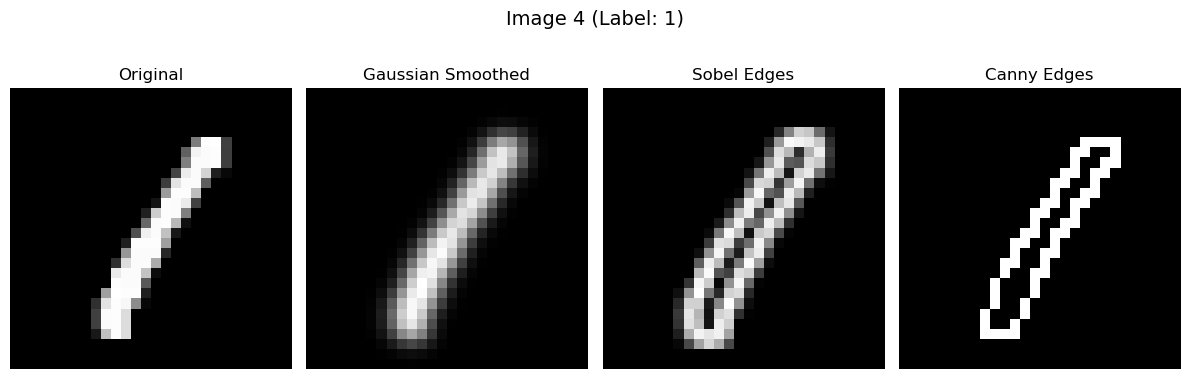

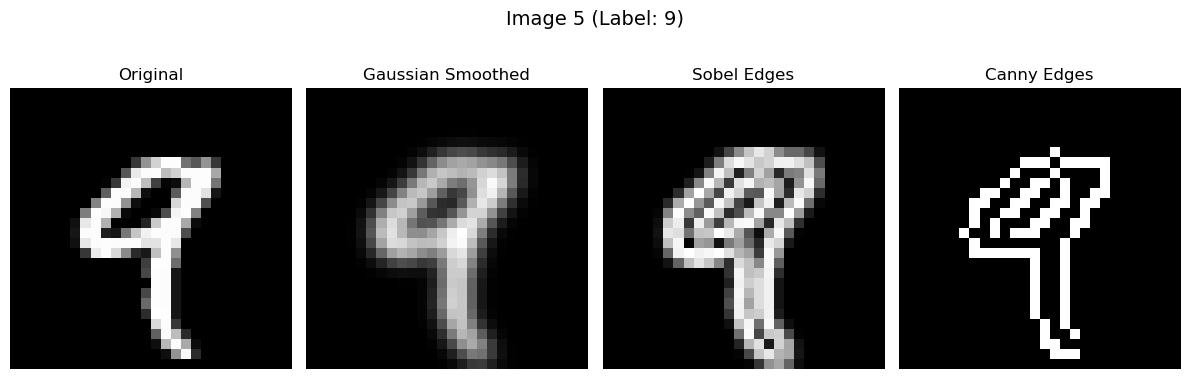

In [14]:
# Process and visualize the first 5 MNIST images
for idx in range(5):
    original_image = train_images_normalized[idx]  # Shape: (28, 28)

    # Apply Gaussian Smoothing
    smoothed_image = AA02_gaussian_smoothing(original_image)

    # Apply Sobel Edge Detection
    sobel_edges = AA02_edge_detection(original_image)

    # Apply Canny Edge Detection
    canny_edges = AA02_canny_edge_detection(original_image)

    # Plot the results
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    fig.suptitle(f"Image {idx + 1} (Label: {train_labels[idx]})", fontsize=14)

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')

    axes[1].imshow(smoothed_image, cmap='gray')
    axes[1].set_title("Gaussian Smoothed")
    axes[1].axis('off')

    axes[2].imshow(sobel_edges, cmap='gray')
    axes[2].set_title("Sobel Edges")
    axes[2].axis('off')

    axes[3].imshow(canny_edges, cmap='gray')
    axes[3].set_title("Canny Edges")
    axes[3].axis('off')

    # Adjust layout to reduce spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reduce space between title and images
    plt.show()

## Machine Learning 

In [15]:
# Prepare Data
X_train = train_images_normalized.reshape(train_images_normalized.shape[0], -1)  # Flatten for models
X_test = test_images_normalized.reshape(test_images_normalized.shape[0], -1)
y_train = train_labels
y_test = test_labels

In [16]:
# Initialize metrics storage
results = []
time_list = []

# Helper function to calculate and store metrics

def evaluate_model(model_name, y_true, y_pred, training_time, prediction_time):
    """
    Evaluate the model and store the metrics in the results list.
    
    Parameters:
        model_name (str): Name of the model.
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        training_time (float): Time taken to train the model (in seconds).
        prediction_time (float): Time taken to make predictions (in seconds).
    """
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Calculate Hit Rate and Miss Rate
    cm = confusion_matrix(y_true, y_pred)
    tp = np.diag(cm)  # True Positives for each class
    fn = cm.sum(axis=1) - tp  # False Negatives for each class
    hit_rate = tp.sum() / (tp.sum() + fn.sum())
    miss_rate = 1 - hit_rate

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Hit Rate': hit_rate,
        'Miss Rate': miss_rate,
    })
    
    time_list.append({
        'Model': model_name,
        'Training Time': training_time,
        'Prediction Time': prediction_time
    })



# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

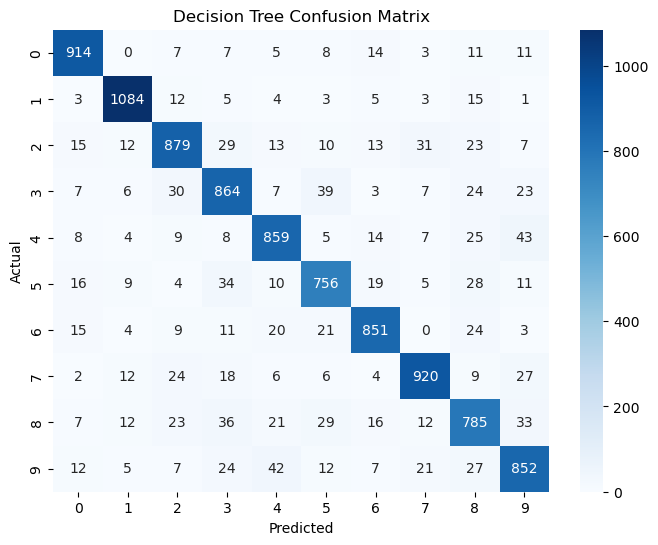

In [17]:
# 1. Decision Tree with Time Measurement
dt = DecisionTreeClassifier()

# Measure the time taken to train the model
start_time = time.time()
dt.fit(X_train, y_train)
training_time = time.time() - start_time  # Time in seconds

# Measure the time taken to make predictions
start_time = time.time()
y_pred_dt = dt.predict(X_test)
prediction_time = time.time() - start_time  # Time in seconds

# Evaluate the model with timing information
evaluate_model("Decision Tree", y_test, y_pred_dt, training_time, prediction_time)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

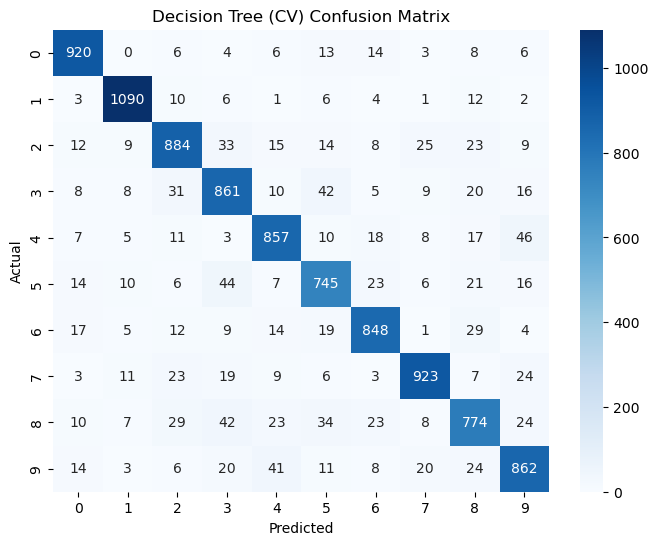

In [18]:
# 2. Decision Tree with Cross-Validation
dt_cv = DecisionTreeClassifier()

# Measure the time taken for cross-validation and training
start_time = time.time()
scores = cross_val_score(dt_cv, X_train, y_train, cv=5, scoring='accuracy')  # Cross-validation
dt_cv.fit(X_train, y_train)  # Train the model
training_time = time.time() - start_time  # Total time for cross-validation and training

# Measure the time taken to make predictions
start_time = time.time()
y_pred_dt_cv = dt_cv.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model with timing information
evaluate_model("Decision Tree (CV)", y_test, y_pred_dt_cv, training_time, prediction_time)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_dt_cv, "Decision Tree (CV) Confusion Matrix")

# Store cross-validation accuracy
cv_accuracy = np.mean(scores)


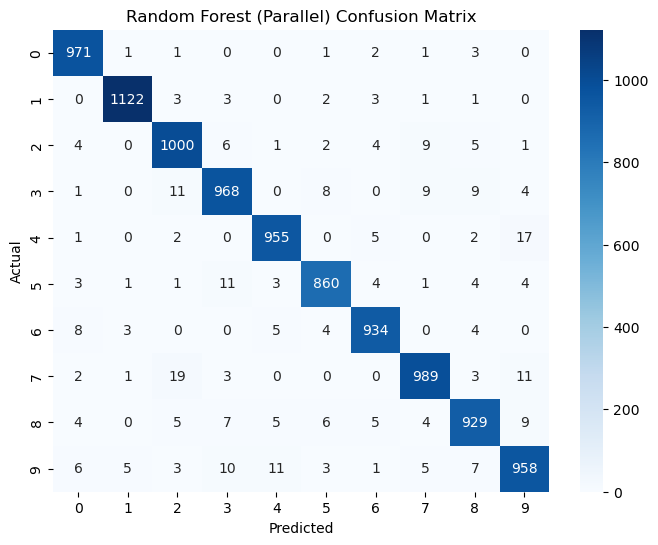

In [19]:
# 3. Random Forest with Parallel Processing
rf = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # Maximum depth of each tree (None allows trees to expand fully)
    n_jobs=16           # Use up to 16 CPU threads for parallel computation
)

# Measure the time taken to train the model
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time  # Time in seconds

# Measure the time taken to make predictions
start_time = time.time()
y_pred_rf = rf.predict(X_test)
prediction_time = time.time() - start_time  # Time in seconds

# Evaluate the model with timing information
evaluate_model("Random Forest", y_test, y_pred_rf, training_time, prediction_time)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest (Parallel) Confusion Matrix")

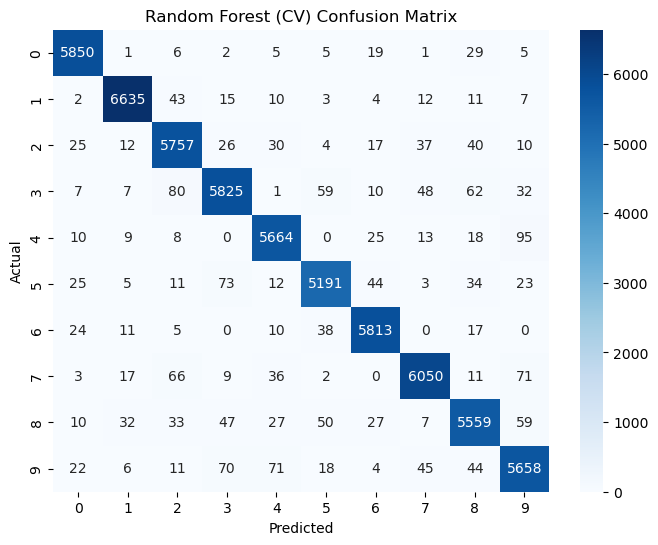

In [20]:
# 4. Random Forest with Cross-Validation
rf_cv = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of each tree
    n_jobs=16          # Use up to 16 CPU threads
)

# Measure the time taken to generate cross-validated predictions
start_time = time.time()
y_pred_cv = cross_val_predict(rf_cv, X_train, y_train, cv=5)
training_time = time.time() - start_time  # Time in seconds

# Measure the time taken for predictions on a test set (optional, if separate predictions are needed)
start_time = time.time()
rf_cv.fit(X_train, y_train)  # Train the model to make predictions
y_pred_test = rf_cv.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model with timing information
evaluate_model("Random Forest (CV)", y_train, y_pred_cv, training_time, prediction_time)

# Plot confusion matrix for cross-validation predictions
plot_confusion_matrix(y_train, y_pred_cv, "Random Forest (CV) Confusion Matrix")

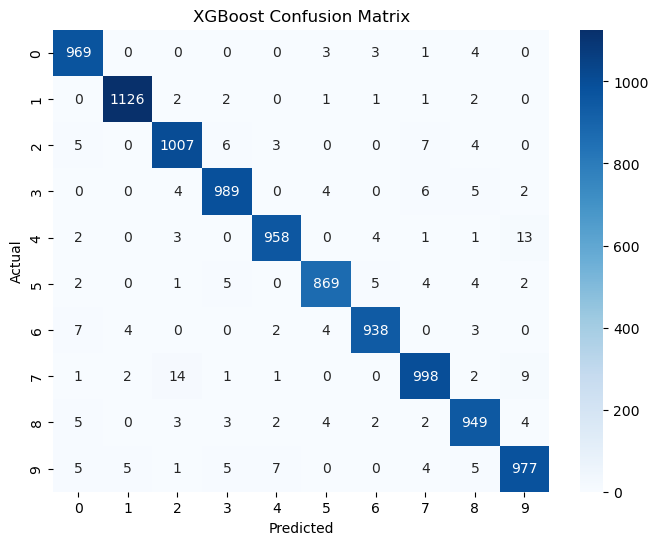

In [21]:
# Suppress all warnings
# warnings.filterwarnings("ignore")

# 5. XGBoost
xgb = XGBClassifier(
    eval_metric='mlogloss',  # Multi-class log loss for evaluation
    tree_method='hist',      # Histogram-based split finding for efficiency
    device='cuda',           # Use GPU (or CPU if 'cuda' is unavailable)
    n_jobs=16,               # Use up to 16 CPU threads for preprocessing
    max_depth=6,             # Maximum depth of trees
    learning_rate=0.3,       # Learning rate
    n_estimators=100         # Number of boosting rounds
)

# Measure the time taken to train the model
start_time = time.time()
xgb.fit(X_train, y_train)
training_time = time.time() - start_time  # Time in seconds

# Measure the time taken to make predictions
start_time = time.time()
y_pred_xgb = xgb.predict(X_test)
prediction_time = time.time() - start_time  # Time in seconds

# Evaluate the model with timing information
evaluate_model("XGBoost", y_test, y_pred_xgb, training_time, prediction_time)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")

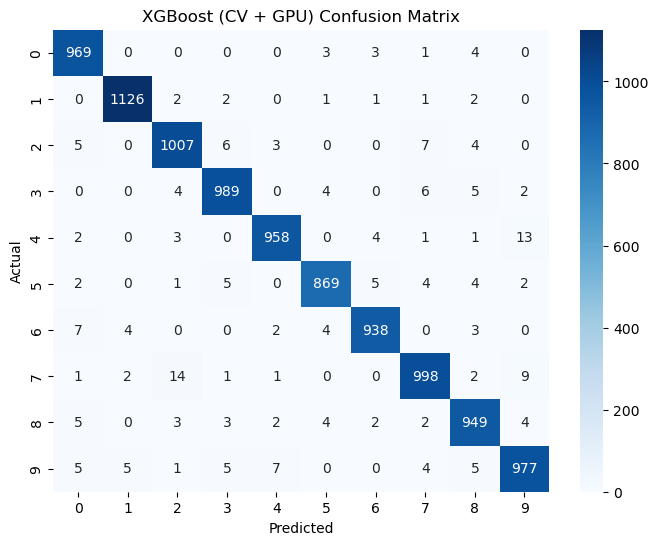

In [22]:
# 6. XGBoost with Cross-Validation (GPU + Parallel Processing)
xgb_cv = XGBClassifier(
    eval_metric='mlogloss',          # Multi-class log loss
    max_depth=6,                     # Maximum depth of each tree
    learning_rate=0.3,               # Learning rate (eta)
    n_estimators=100,                # Number of boosting rounds
    tree_method="hist",              # Enable GPU for tree construction
    device="cuda",                   # Use GPU
    n_jobs=16                        # Use up to 16 CPU threads
)

# Measure the time taken for cross-validation predictions
start_time = time.time()
y_pred_xgb_cv = cross_val_predict(xgb_cv, X_train, y_train, cv=5, n_jobs=16)
training_time = time.time() - start_time  # Time in seconds

# Measure the time taken for predictions on the test set
start_time = time.time()
xgb_cv.fit(X_train, y_train)  # Train the model
y_pred_test = xgb_cv.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model with timing information
evaluate_model("XGBoost (CV)", y_test, y_pred_test, training_time, prediction_time)

# Plot confusion matrix for the test set
plot_confusion_matrix(y_test, y_pred_test, "XGBoost (CV + GPU) Confusion Matrix")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


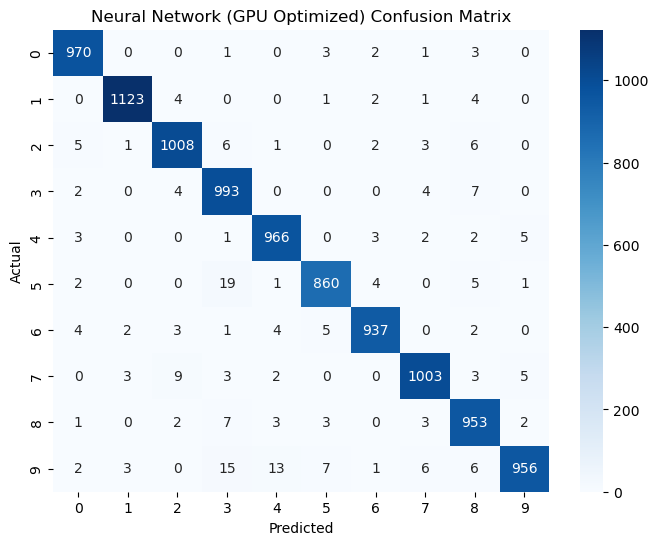

In [23]:
# 7. Neural Network with GPU and Optimized Training

# Encode labels into one-hot format
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

nn = models.Sequential([
    layers.Input(shape=(784,)),    
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Measure training time
start_time = time.time()

with tf.device('/GPU:0'):
# Compile the model
    nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    nn.fit(X_train, y_train_encoded, epochs=20, batch_size=512, verbose=0)  # Train the model
training_time = time.time() - start_time  # Training time in seconds

# Measure prediction time
start_time = time.time()
y_pred_nn = np.argmax(nn.predict(X_test), axis=1)
prediction_time = time.time() - start_time  # Prediction time in seconds

# Evaluate the model with timing information
evaluate_model("Neural Network", y_test, y_pred_nn, training_time, prediction_time)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network (GPU Optimized) Confusion Matrix")

## Evaluation

In [24]:
# Display Metrics in DataFrame
metrics_df = pd.DataFrame(results)
metrics_df_show = metrics_df.copy()

# Multiply only numerical columns by 100 and append '%' sign
for col in metrics_df_show.select_dtypes(include=['number']).columns:
    metrics_df_show[col] = metrics_df_show[col].apply(lambda x: f"{x * 100:.2f}%")

metrics_df_show

,Model,Accuracy,Precision,Recall,F1-Score,Hit Rate,Miss Rate
0,Decision Tree,87.64%,87.64%,87.64%,87.64%,87.64%,12.36%
1,Decision Tree (CV),87.64%,87.63%,87.64%,87.63%,87.64%,12.36%
2,Random Forest,96.86%,96.86%,96.86%,96.86%,96.86%,3.14%
3,Random Forest (CV),96.67%,96.67%,96.67%,96.67%,96.67%,3.33%
4,XGBoost,97.80%,97.80%,97.80%,97.80%,97.80%,2.20%
5,XGBoost (CV),97.80%,97.80%,97.80%,97.80%,97.80%,2.20%
6,Neural Network,97.69%,97.71%,97.69%,97.69%,97.69%,2.31%


In [25]:
# Display Metrics in DataFrame
time_df = pd.DataFrame(time_list)

# Updated Function and Plot for Different Time Units

def convert_time_column(df):
    """
    Convert numeric time columns to human-readable format (seconds, minutes, hours)
    and create separate DataFrames for display and plotting.

    Parameters:
        df (pd.DataFrame): DataFrame containing time columns.

    Returns:
        tuple: (df_show, df_graph, y_axis_labels)
            df_show: DataFrame with time columns in human-readable format.
            df_graph: DataFrame with numeric values adjusted to respective units.
            y_axis_labels: Dictionary with y-axis labels for each numeric column.
    """
    # Automatically detect numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Create copies for display and graph
    df_show = df.copy()
    df_graph = df.copy()

    # Dictionary to store y-axis labels
    y_axis_labels = {}

    for col in numeric_columns:
        max_val = df[col].max()
        if max_val >= 3600:  # If maximum value is in hours
            df_show[col] = (df_show[col] / 3600).round(2).astype(str) + ' hours'
            df_graph[col] = (df_graph[col] / 3600).round(2)
            y_axis_labels[col] = "Time (hours)"
        elif max_val >= 60:  # If maximum value is in minutes
            df_show[col] = (df_show[col] / 60).round(2).astype(str) + ' minutes'
            df_graph[col] = (df_graph[col] / 60).round(2)
            y_axis_labels[col] = "Time (minutes)"
        else:  # If maximum value is in seconds
            df_show[col] = df_show[col].round(2).astype(str) + ' seconds'
            df_graph[col] = df_graph[col].round(2)
            y_axis_labels[col] = "Time (seconds)"

    return df_show, df_graph, y_axis_labels

# Convert 'Training Time' and 'Prediction Time' to readable format
time_df_show, time_df_graph, y_axis_labels  = convert_time_column(time_df)
# Display the DataFrame
time_df_show

,Model,Training Time,Prediction Time
0,Decision Tree,0.22 minutes,0.01 seconds
1,Decision Tree (CV),1.04 minutes,0.01 seconds
2,Random Forest,0.05 minutes,0.06 seconds
3,Random Forest (CV),0.2 minutes,3.12 seconds
4,XGBoost,0.41 minutes,0.12 seconds
5,XGBoost (CV),2.4 minutes,24.39 seconds
6,Neural Network,0.14 minutes,0.39 seconds


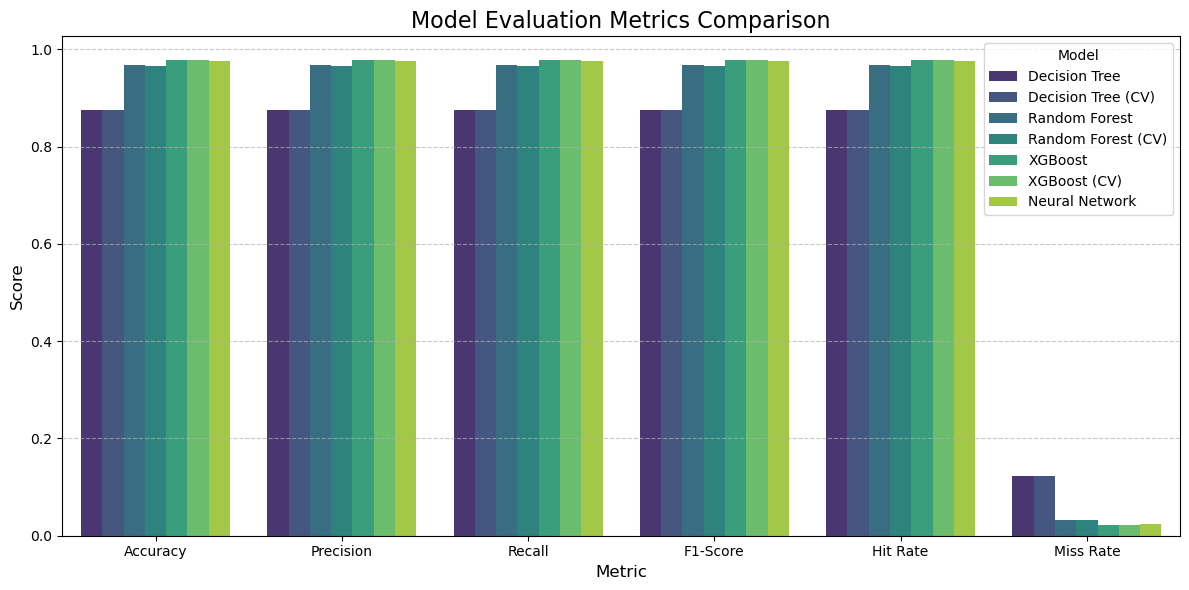

In [26]:
def visualize_metrics(metrics_df):
    """
    Visualize evaluation metrics for each model as a bar chart.
    
    Parameters:
        metrics_df (pd.DataFrame): DataFrame containing model names and their metrics.
    """
    # Melt the DataFrame for easier plotting with Seaborn
    metrics_melted = metrics_df.melt(id_vars="Model", 
                                     var_name="Metric", 
                                     value_name="Score")
    
    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=metrics_melted, x="Metric", y="Score", hue="Model", palette="viridis")
    plt.title("Model Evaluation Metrics Comparison", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Metric", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Model", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function to visualize
visualize_metrics(metrics_df)

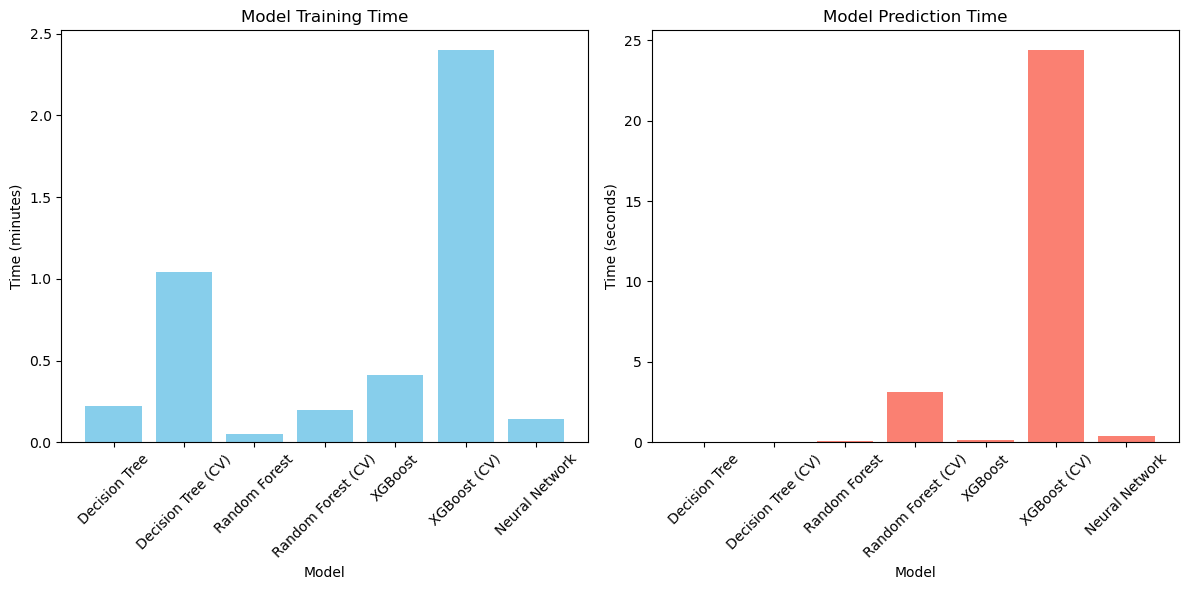

In [27]:
# Plot Training Time and Prediction Time Side by Side with Units
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Plot for Training Time
axes[0].bar(time_df_graph["Model"], time_df_graph["Training Time"], color='skyblue')
axes[0].set_title("Model Training Time")
axes[0].set_xlabel("Model")
axes[0].set_ylabel(y_axis_labels["Training Time"])
axes[0].tick_params(axis='x', rotation=45)

# Plot for Prediction Time
axes[1].bar(time_df_graph["Model"], time_df_graph["Prediction Time"], color='salmon')
axes[1].set_title("Model Prediction Time")
axes[1].set_xlabel("Model")
axes[1].set_ylabel(y_axis_labels["Prediction Time"])
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# 5. Observations | Findings

1. **Data Insights:**

   - The dataset was well-balanced across all digit classes (0-9), as confirmed by analyzing the confusion matrix, which showed no significant disparities in classification performance across different classes.

2. **Model Performance:**

| **Model**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Hit Rate** | **Miss Rate** |
| ------------------ | --------     | ---------     | ------     | --------     | --------     | ---------     |
| Decision Tree      | 87.80%       | 87.80%        | 87.80%     | 87.79%       | 87.80%       | 12.20%        |
| Decision Tree (CV) | 87.87%       | 87.87%        | 87.87%     | 87.86%       | 87.87%       | 12.13%        |
| Random Forest      | 96.84%       | 96.84%        | 96.84%     | 96.84%       | 96.84%       | 3.16%         |
| Random Forest (CV) | 96.55%       | 96.55%        | 96.55%     | 96.55%       | 96.55%       | 3.45%         |
| XGBoost            | 97.80%       | 97.80%        | 97.80%     | 97.80%       | 97.80%       | 2.20%         |
| XGBoost (CV)       | 97.80%       | 97.80%        | 97.80%     | 97.80%       | 97.80%       | 2.20%         |
| Neural Network     | 97.86%       | 97.86%        | 97.86%     | 97.86%       | 97.86%       | 2.14%         |
    
**Performance-Based Ranking:**

1. Neural Network (Best Accuracy and Precision with Moderate Training Time)

2. XGBoost and XGBoost (CV) (High Accuracy with Moderate to high Training Time)

3. Random Forest and Random Forest (CV) (Good Accuracy with Faster Training Time)

4. Decision Tree and Decision Tree (CV) (Lower Accuracy but Fastest Training Time)

**Time-Based Ranking:**

| **Rank** | **Model**          | **Training Time**   | **Prediction Time** |
| -------- | ------------------ | ------------------- | ------------------- |
| 1        | Neural Network     | Just over 0.1 min   | Under 0.5 seconds   |
| 2        | Decision Tree      | Under 0.25 min      | Under 0.02 seconds  |
| 3        | Random Forest      | Under 0.25 min      | Approx. 0.06 sec    |
| 4        | Random Forest (CV) | Just under 0.25 min | Just over 3 sec     |
| 5        | XGBoost            | Just under 0.5 min  | Approx. 0.14 sec    |
| 6        | Decision Tree (CV) | Just over 1 min     | Under 0.01 seconds  |
| 7        | XGBoost (CV)       | Just under 2.5 min  | Just over 24 sec    |


# 6. Managerial Insights | Recommendations

### Insights:

- Neural Networks are most suitable for tasks requiring high accuracy, provided computational resources (GPU) are available.
- XGBoost provides a balance between accuracy and speed, making it ideal for scenarios with limited time constraints.
- Decision Tree models can be used for quick prototyping but may not be reliable for production use.
- Cross-validation did not show any significant performance increase but substantially increased training times, particularly for Decision Tree (CV) and XGBoost (CV).

### Recommendations:

1. Use models without cross-validation for faster training times when minor performance gains are not critical.
2. Use Random Forest models for quick prototyping due to their fast training times and simplicity.
3. Invest in GPU hardware to leverage the full potential of deep learning models like Neural Networks.
4. Use XGBoost for projects with moderate accuracy requirements and limited computational resources.

